# Tutorial: tutorial_read_catalogue_data

This function allows you to read in the GALAH DR4 catalogue data.

Author: Sven Buder (ANU, sven.buder@anu.edu.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [9]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
    %config Completer.use_jedi = False
except:
    pass

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table

In [2]:
# Read in the Table
galah_dr4_allstar = Table.read('../catalogs/galah_dr4_allstar_240705.fits')

In [43]:
# Apply quality cuts
galah_dr4_allstar_quality_cuts = (
    # bit mask flags 8 or lower, see Sec. 6.3 and Table 5 of GALAH DR4
    (galah_dr4_allstar['flag_sp'] < 2**9 - 1) &
    # You could also imagine enforcing only good astrometric solutions.
    # (galah_dr4_allstar['ruwe'] < 1.4) &
    (galah_dr4_allstar['flag_mg_fe'] == 0)
)
print("Nr. of stars: ",len(galah_dr4_allstar['flag_sp'][galah_dr4_allstar_quality_cuts]),' of ',len(galah_dr4_allstar['flag_sp']))

Nr. of stars:  719231  of  917588


A word on notation of elemental abundances:

The are estimated as the logarithmic number density ratio:

$$\mathrm{A(X)} = \log_{10} \frac{N_\mathrm{X}}{N_\mathrm{H}} + 12$$

For the Sun, we have estimated $\mathrm{A(Fe)}_\odot = 7.52$ and $\mathrm{A(Fe)}_\odot = 7.45$.

To put abundances in relation to the Sun, we subtract these values and write:

$$\mathrm{[X/H]} = \mathrm{A(X)} - \mathrm{A(X)}_\odot$$

You can then also estimate abundances relative to iron instead of hydrogen (because elements trace iron closer than hydrogen, so your deviations are easier to understand):

$$\mathrm{[X/Fe]} = \mathrm{[X/H]} - \mathrm{[Fe/H]}$$

To sum up, we typically look at both the iron abundance (implied: relative to hydrogen):
$$\mathrm{[Fe/H]} = \log_{10} \frac{N_\mathrm{Fe}}{N_\mathrm{H}} + 12 - 7.52$$

and the magnesium abundances (implied: relative to iron):
$$\mathrm{[Mg/Fe]} = \log_{10} \frac{N_\mathrm{Mg}}{N_\mathrm{Fe}} + 12 - 7.45 - \mathrm{[Fe/H]}$$

We also often plot the spectroscopic colour-magnitude diagram, where we use effective temperature vs. logarithmic surface gravity.

How does that look?

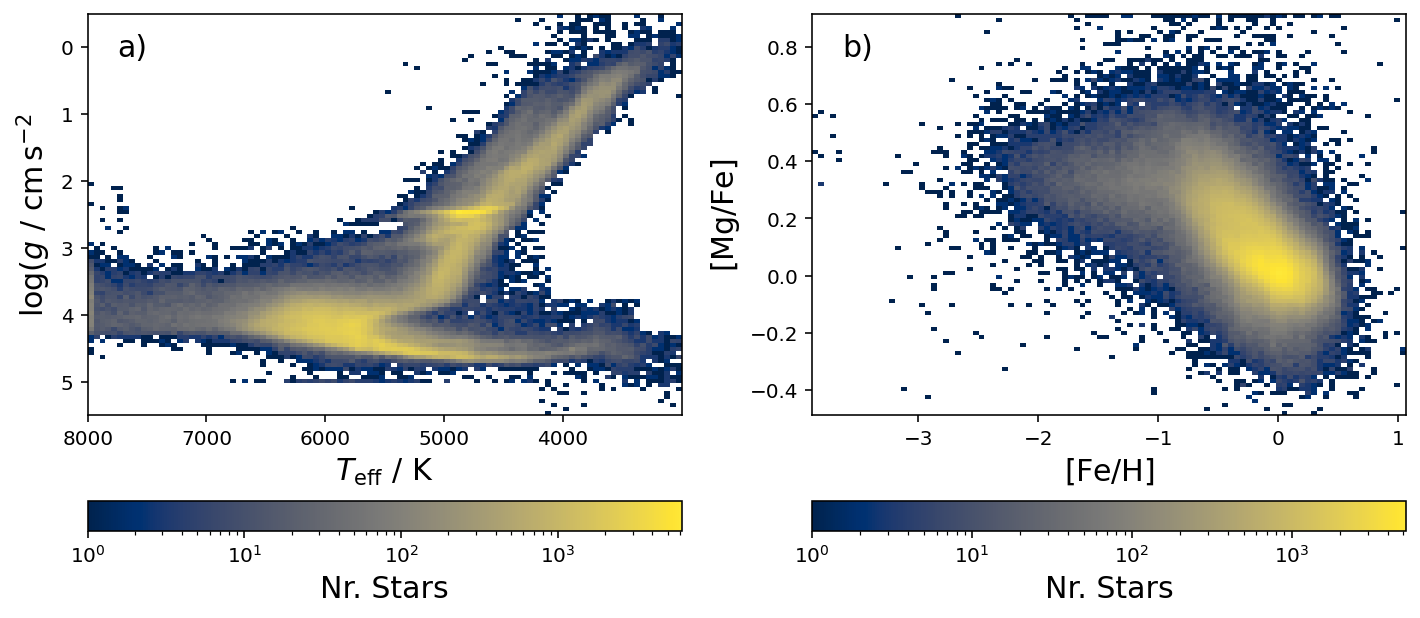

In [44]:
# Plot the 2 most important plots:
# a) Teff vs. logg: the spectroscopic Colour-Magnitude Diagram)
# b) [Fe/H] vs. [Mg/Fe]: "metallicity" vs. the predominant contribution from SNII vs. SNIa

f, gs = plt.subplots(1,2,figsize=(10,4.5))
gs = gs.flatten()

ax = gs[0]
ax.text(0.05,0.95,'a)',transform=ax.transAxes,va='top',ha='left',fontsize=15)
ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel(r'$\log (g~/~\mathrm{cm\,s^{-2}}$',fontsize=15)
h = ax.hist2d(
    galah_dr4_allstar['teff'][galah_dr4_allstar_quality_cuts],
    galah_dr4_allstar['logg'][galah_dr4_allstar_quality_cuts],
    bins = 100,
    cmin = 1, cmap = 'cividis', norm = LogNorm()
);
cbar = plt.colorbar(h[-1], ax=ax, orientation = 'horizontal')
cbar.set_label('Nr. Stars',fontsize=15)
ax.invert_xaxis()
ax.invert_yaxis()

ax = gs[1]
ax.text(0.05,0.95,'b)',transform=ax.transAxes,va='top',ha='left',fontsize=15)
ax.set_xlabel(r'$\mathrm{[Fe/H]}$',fontsize=15)
ax.set_ylabel(r'$\mathrm{[Mg/Fe]}$',fontsize=15)
h = ax.hist2d(
    galah_dr4_allstar['fe_h'][galah_dr4_allstar_quality_cuts],
    galah_dr4_allstar['mg_fe'][galah_dr4_allstar_quality_cuts],
    bins = 100,
    cmin = 1, cmap = 'cividis', norm = LogNorm()
);
cbar = plt.colorbar(h[-1], ax=ax, orientation = 'horizontal')
cbar.set_label('Nr. Stars',fontsize=15)

plt.tight_layout()
plt.show()
plt.close()